In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
%matplotlib inline

In [3]:
Datas = glob.glob(os.getcwd() + '/Data/*.csv')


In [4]:
def Processing(d):
    time_max = d.loc[len(d)-1].date + 1
    clean_d = d.loc[ ~d.meltRate.isna() & ~d['thermalDriving'].isna() & ~d['halineDriving'].isna()]
    return clean_d, time_max

Text(0, 0.5, 'meltRate m/s')

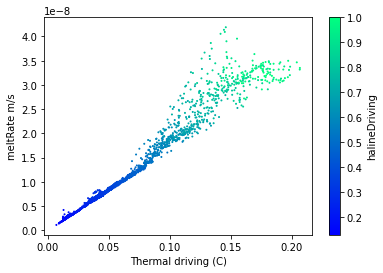

<Figure size 432x288 with 0 Axes>

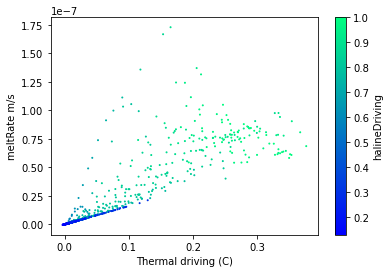

<Figure size 432x288 with 0 Axes>

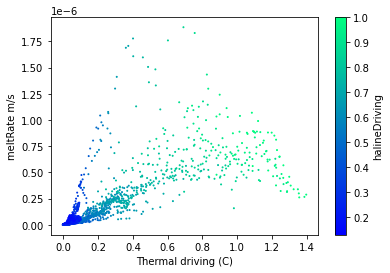

<Figure size 432x288 with 0 Axes>

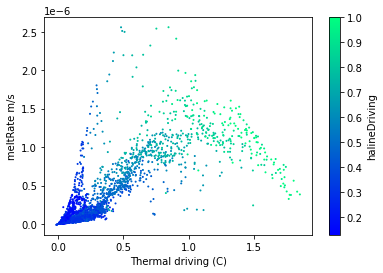

<Figure size 432x288 with 0 Axes>

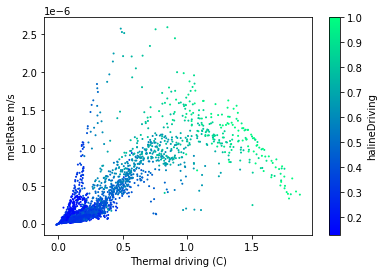

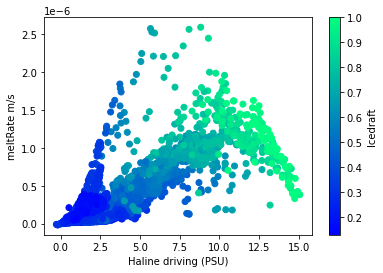

In [5]:
for data_name in Datas:
    data = pd.read_csv(data_name)
    clean_data, tmx = Processing(data)
    for i in range(int(tmx)):
        if i%48 ==0:
            t = 239
            plt.figure()
            Current = clean_data.loc[clean_data.date == i]

            x_T, y = np.array(Current.thermalDriving), np.array(Current.meltRate)
            c = np.array(Current.iceDraft / max(Current.iceDraft))

            plt.scatter(x_T, y, c = c, s= 1, cmap = plt.get_cmap('winter'))
            cb = plt.colorbar()
            cb.cmap(c)
            cb.set_label('halineDriving')#, rotation=270)
            plt.xlabel('Thermal driving (C)')
            plt.ylabel('meltRate m/s')
            plt.figure()

x_S = np.array(clean_data.halineDriving.loc[clean_data.date == t])
plt.scatter(x_S, y, c = c, cmap = plt.get_cmap('winter'))
cb = plt.colorbar()
cb.cmap(c)
cb.set_label('Icedraft')#, rotation=270)
plt.xlabel('Haline driving (PSU)')
plt.ylabel('meltRate m/s')

In [6]:
clean_data

,y,x,meltRate,thermalDriving,halineDriving,iceDraft,date
97,0,194,1.445518e-09,0.009086,0.127754,82.815510,0
158,0,316,2.533100e-09,0.013837,0.194261,91.276440,0
337,2,194,1.421181e-09,0.008926,0.125516,81.651650,0
387,2,294,2.025993e-09,0.012627,0.177358,89.908270,0
388,2,296,1.932426e-09,0.012012,0.168752,90.281364,0
...,...,...,...,...,...,...,...
2303677,76,314,2.370411e-07,0.080768,1.095842,100.000000,239
2303678,76,316,3.454754e-07,0.098296,1.324571,106.927826,239
2303679,76,318,2.071392e-07,0.037772,0.521274,100.000000,239
2303857,78,194,4.374625e-08,0.060759,0.831188,82.566990,239


In [7]:
max(clean_data.iceDraft.loc[clean_data.date == 239])

596.0

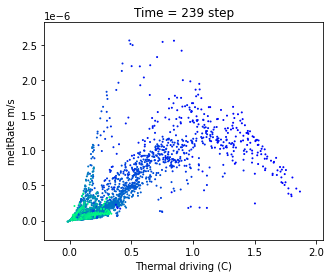

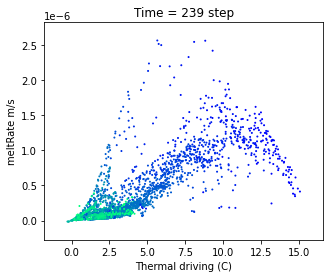

In [8]:
def get_anim(var):
    Current = clean_data.loc[clean_data.date == 0]
    x, y = Current[var].values, Current['meltRate'].values
    fig, ax = plt.subplots(figsize=(5, 4))
    #c = np.array(Current.iceDraft / max(Current.iceDraft))
    #c = np.array(Current.date / 260)
    c = np.array(Current.x / max(Current.x))
    scat = ax.scatter(x_T, y, c=c, s=1, cmap = plt.get_cmap('winter'))

    plt.xlabel('Thermal driving (C)')
    plt.ylabel('meltRate m/s')
    def update_plot(i, clean_data, var):
        New = clean_data.loc[clean_data.date == i]
        x, y = New[var].values, New.meltRate.values
        X = np.c_[x, y]
        scat.set_offsets(X)
        c = np.array(New.date / max(New.date))

        #scat.set_color(c)
        ax.set_title("Time = {} step".format(i))
        xmin=x.min(); xmax=x.max()
        ymin=y.min(); ymax=y.max()
        ax.set_xlim(xmin-0.1*(xmax-xmin),xmax+0.1*(xmax-xmin))
        ax.set_ylim(ymin-0.1*(ymax-ymin),ymax+0.1*(ymax-ymin))
        return scat

    ani = animation.FuncAnimation(fig, update_plot, frames=int(tmx),
                                  fargs=(clean_data ,var))
    return ani
var = 'thermalDriving'
HTML(get_anim(var).to_html5_video())
var = 'halineDriving'
HTML(get_anim(var).to_html5_video())

In [9]:
import xarray as xr

In [10]:
Data_Name = '*COM_NEMO-CNRS.nc'
File_path = '/bettik/bouissob/ISOMIP+/'
files = glob.glob(File_path + Data_Name)

In [11]:
files

['/bettik/bouissob/ISOMIP+/Ocean1_COM_NEMO-CNRS.nc',
 '/bettik/bouissob/ISOMIP+/Ocean4_COM_NEMO-CNRS.nc',
 '/bettik/bouissob/ISOMIP+/Ocean3_COM_NEMO-CNRS.nc',
 '/bettik/bouissob/ISOMIP+/Ocean2_COM_NEMO-CNRS.nc']

In [12]:
TOT = pd.DataFrame()
for ind, file in enumerate(files):
    Data = xr.open_dataset(file)
    MeltRates = Data.meltRate.sel(nTime = 239).to_dataframe().reset_index(drop = True)
    ThermForc = Data.thermalDriving.sel(nTime = 239).to_dataframe().reset_index(drop = True)
    HalinForc = Data.halineDriving.sel(nTime = 239).to_dataframe().reset_index(drop = True)
    data = [MeltRates, ThermForc, HalinForc]
    Tot = pd.concat(data, axis=1)
    Tot['OC'] = ind
    Tot = Tot.loc[(~Tot.meltRate.isna() & ~Tot.thermalDriving.isna() & ~Tot.halineDriving.isna())]
    TOT = pd.concat([TOT, Tot]).reset_index(drop=True)
Mask_tot = len(files)

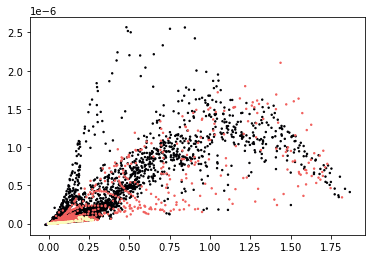

In [13]:
plt.scatter(TOT.thermalDriving, TOT.meltRate, c = TOT.OC, cmap = plt.get_cmap('magma'), s = 2)

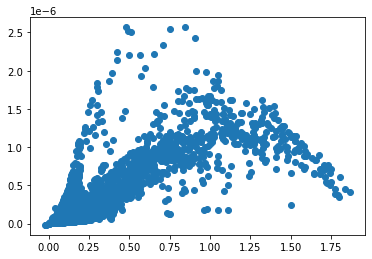

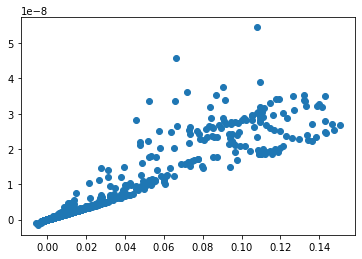

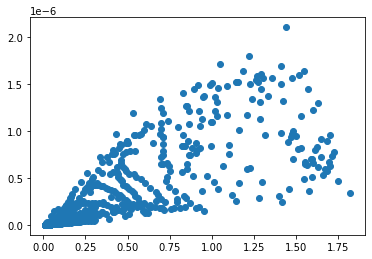

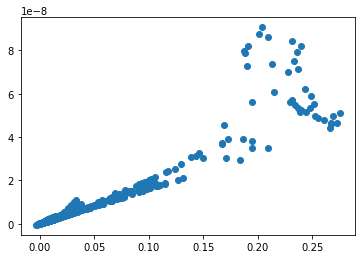

In [14]:
for i in range(Mask_tot):
    plt.figure()
    spec = TOT.loc[TOT.OC == i]
    plt.scatter(spec.thermalDriving, spec.meltRate)